## PCA(Principal Component Analysis)

PCA(Principal Component Analysis)
- 가장 대표적인 차원 축소 기법
- 여러 변수 간에 존재하는 상관관계를 이용해 
    - 이를 대표하는 주성분을 추출해 차원을 축소하는 기법
- 기존 데이터의 정보 유실이 최소화하도록 함
- 그러기 위해서는 **가장 높은 분산을 가지는 데이터의 축**을 찾아
    - 이 축으로 차원을 축소하는데, 이것이 PCA의 주성분이 됨
- 즉, 분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주

예: 키와 몸무게 2개의 피처를 가지고 있는 데이터 세트
- 2개의 피처를 한 개의 주성분을 가진 데이터 세트로 차원 축소
- 데이터 변동성이 큰 방향으로 축을 생성하고
- 새롭게 생성된 축으로 데이터를 투영하는 방식

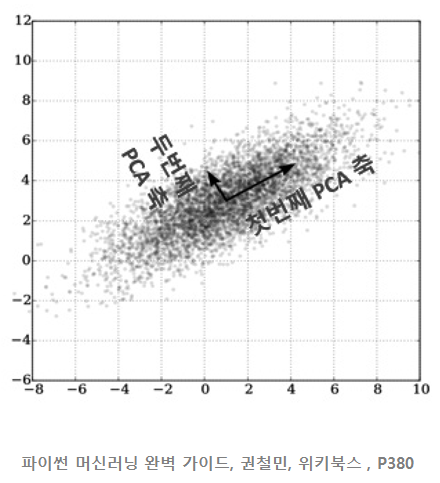

PCA 알고리즘 수행 순서   


(1)  입력 데이터 세트의 공분산 행렬 생성(상관성을 파악)    
(2) 공분산 행렬의 고유벡터와 고유값 계산  
(3) 고유값이 가장 큰 순으로 K개(PCA 변환 차수만큼)만큼 고유벡터 추출  
(4) 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터 변환 

- tip. 공분산(共分散, 영어: covariance)은 2개의 확률변수의 선형 관계를 나타내는 값 만약 2개의 변수중 하나의 값이 상승하는 경향을 보일 때 다른 값도 상승하는 선형 상관성이 있다면 양수의 공분산을 갖는다

### PCA 예제1

PCA 예제1
- 붓꽃 데이터 세트 사용
- 4개의 속성(피처) : sepal length, sepal width, petal length, petal width
- PCA 사용 차원 축소 : 4개의 속성을 2개의 PCA 차원으로 압축
- 원본 데이터 세트와 압축된 데이터 세트 차이점 확인

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


**sepal_length, sepal_width 두개의 속성으로 데이터 산포 시각화**

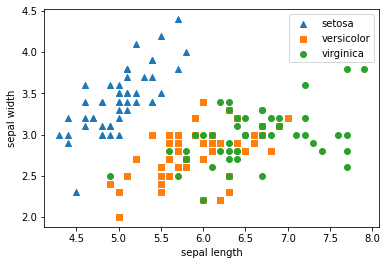

In [3]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 
# 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

# 결과
# Setosa 경우 
# sepal width가 3.0보다 크고
# sepal length가 6.0 이하인 곳에
# 일정하게 분포

# Versicolor와 Virginica
# 겹치는 부분 존재
# sepal width와 sepal length 조건만으로는 분류가 어려운 복잡한 조건

PCA로 4개 속성을 2개로 압축한 뒤  
2개의 PCA 속성으로 품종 분포 시각화  

PCA 적용 전 개별 속성 스케일링 변환 작업 필요  
PCA는 여러 속성의 값을 연산해야 하므로  
속성의 스케일에 영향을 받음  
사이킷런의 StandardScaler 이용해서  
평균이 0 분산이 1인 표준 정규 분포로 속성값 변환  

** 평균이 0, 분산이 1인 정규 분포로 원본 데이터를 변환 **

In [4]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [5]:
iris_scaled[:10] # 10개 확인

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [69]:
iris_scaled.shape

(150, 4)

** PCA 변환 수행 **

스케일링이 적용된 데이터 세트에 PCA 적용
- 4차원(4개의 속성)의 붓꽃 데이터를 2차원(2개의 PCA 속성) PCA 데이터로 변환
- 사이킷런의 PCA 클래스 사용
- n_components 파라미터 : PCA로 변환할 차원의 수
- fit()/transform() 호출해서 PCA 변환 수행

In [6]:
from sklearn.decomposition import PCA

# 변환할 차원 수
pca=PCA(n_components=2)
#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled) # 찾은 2개의 주성분으로 데이터 투영 : 차원축소
print(iris_pca.shape)

# 2차원으로 변환됨 
# 150 x 2 넘파이 행렬

(150, 2)


In [ ]:
# iris_pca

In [7]:
# 넘파이 행렬을 DataFrame로 변환

# PCA 변환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


** PCA로 차원 축소된 피처들로 데이터 산포도 시각화 **

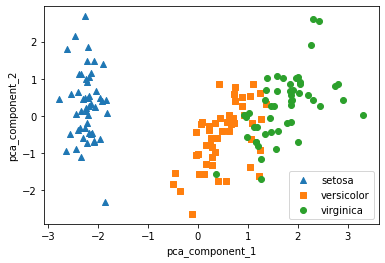

In [8]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

# 결과
# pca_cmponent_1 축을 기반으로 Setosa 품종은 명확하게 구분 가능
# Versicolor와 Virginica
# - 서로 겹치는 부분 일부 존재하지만 비교적 잘 구분됨
# 이는 PCA의 첫 번째 새로운 축인 pca_component_1 축이
# 원본 데이터의 변동성을 잘 반영했기 때문

** 각 PCA Component별 변동성 비율 

PCA Component별로 원본 데이터의 변동성 반영 정도 확인  
PCA 객체의 explained_variance_ration_ 속성  
- 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율 제공

In [9]:
print(pca.explained_variance_ratio_)

# 첫 번째 PCA 변환 요소인 pca_component_1 : 전체 변동성의 약 72.9% 차지
# 두 번째 PCA 변환 요소인 pca_component_2 : 약 22.8% 차지
# 즉, PCA 2개 요소로만 변환해도 원본 데이터의 변동성을 95% 설명할 수 있음

[0.72962445 0.22850762]


** 원본 데이터와 PCA 변환된 데이터 기반에서 예측 성능 비교 **

원본 붓꽃 데이터 세트와 PCA로 변환된 데이터 세트에  
각각 분류 알고리즘을 적용한 후 결과 비교  
Estimator는  RansdomForestClassifier 이용  
cross_val_score() 이용 3개의 교차 검증 세트로 정확도 결과 비교

In [12]:
# 원본 붓꽃 데이터에 랜덤 포레스트 알고리즘 적용한 결과

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf,iris.data,iris.target,cv=3)
print('원본 데이터 교차 검증 개별 정확도 :', scores)
print('원본 데이터 평균 정확도 : ', np.mean(scores))

원본 데이터 교차 검증 개별 정확도 : [0.98 0.94 0.96]
원본 데이터 평균 정확도 :  0.96


In [14]:
# 기존 4차원 데이터를 2차원으로 PCA 변환한 데이터 세트에 랜덤 포레스트 적용

pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf,pca_X,iris.target,cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도 :', scores_pca)
print('PCA 변환 데이터 평균 정확도 : ', np.mean(scores_pca))

# 결과
# 원본 데이터 세트 대비 예측 정확도는 
# PCA 변환 차원 개수에 따라 예측 성능이 떨어질 수 밖에 없음
# 붓꽃 데이터의 경우 4개의 속성이 2개의 변환 속성으로 감소하면서
# 예측 성능의 정확도가 원본 데이터 대비 8~10% 하락
# 10% 정확도 하락은 비교적 큰 성능 수치의 감소지만
# 4개의 속성이 2개로로, 속성 개수가 50% 감소한 것을 고려하면
# PCA 변환 후에도 원본 데이터의 특성을 상당 부분 유지하고 있음을 나타냄

PCA 변환 데이터 교차 검증 개별 정확도 : [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도 :  0.88


### PCA 예제2

신용카드 데이터 세트 PCA 변환
좀 더 많은 피처를 가진 데이터 세트를
적은 PCA 컴포넌트 기반으로 변환한 뒤
예측 영향도가 어떻게 되는지
변환된 PCA 데이터 세트에 기반해서 비교

사용 데이터 : UCI Machine Learning Repository에 있는
신용카드 고객 데이터 세트 (Credit Card Clients Data Set)
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
Data Folder
default of credit card clients.xls
pca_credit_card.xls로 변경

In [16]:
# 데이터 로드 및 컬럼명 변환
# 엑셀 파일 열고 첫 행과 ID 칼럼 확인

import pandas as pd

# header로 의미 없는 첫 행 제거
# iloc로 첫 번째 칼럼 ID 제거 
df = pd.read_excel('../data/pca_credit_card.xls', sheet_name='Data', header=1).iloc[0:, 1:]
print(df.shape)
df.head(3)

# 30,000 개의 레코드
# 24개의 속성
# default payment next month 속성 : target 값
# - 다음달 연체 여부
# - 연체 : 1
# - 정상 납부 : 0

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


수행 작업

칼럼명 변경
- PAY_0 다음에 PAY_2 있으므로 PAY_0을 PAY_1으로 변경
- default payment next month도 default로 변경
default 칼럼을 y_target 변수로 별도 저장
default 칼럼을 제외한 피처 데이터는 별도의 DataFrame으로 생성

In [17]:
# 칼럼명 변경
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)

# default 칼럼을 y_target 변수로 별도 저장
y_target = df['default']

# default 칼럼을 제외한 피처 데이터는 별도의 DataFrame으로 생성
X_features = df.drop('default', axis=1)

In [18]:
# target 값 확인
y_target.value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [19]:
X_features.info() 
# 23개의 속성
# PAY_, BILL_ : 속성 간 상관도 높음
# -> 상관도 확인 필요

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

** 피처간 상관도 시각화 **

corr() 이용해 각 속성 간의 상관도를 구한 뒤  
heatmap으로 시각화

<AxesSubplot:>

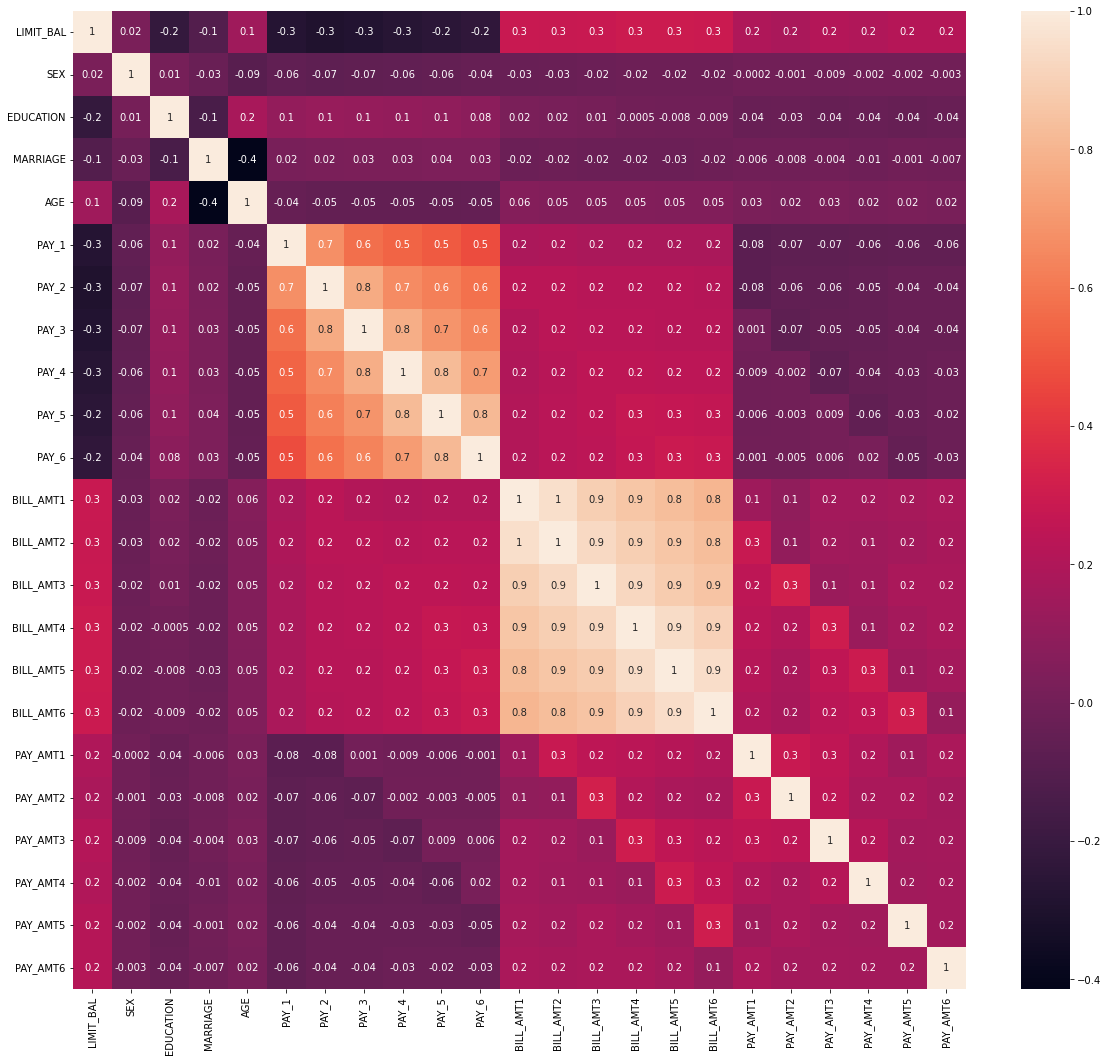

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,18))

# 참고 g : greater than o (0.00 없음)
# .1f 하면 : 0.00 있음
corr=X_features.corr()
sns.heatmap(corr,annot=True,fmt='.1g')
# 결과 
# BILL_AMT1~BILL_AMT6 6개 속성끼리 상관도가 대부분 0.9 이상으로 매우 높음
# PAY_1~PAY_6까지의 속성 역시 상관도가 높음
# 이렇게 높은 상관도를 가진 속성들은 
# 소수의 PCA 만으로도 자연스럽게 이 속성들의 변동성을 수용할 수 있음

# --> 
# BILL_AMT1~BILL_AMT6 6개 속성을 2개의 컴포넌트로 PCA 변환한 뒤
# 개별 컴포넌트의 변동성을 explained_variance_ratio_ 속성으로 확인


**상관도가 높은 피처들의 PCA 변환 후 변동성 확인**

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#BILL_AMT1 ~ BILL_AMT6까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1, 7)]
print('대상 속성명:', cols_bill)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']


In [25]:
# PCA 적용 전 개별 속성 스케일링 변환 작업 수행
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])

In [29]:
# 2개의 PCA 속성을 가진 PCA 객체 생성하고
pca=PCA(n_components=2)
pca.fit_transform(df_cols_scaled)
# explained_variance_ratio_  출력
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

PCA Component별 변동성: [0.90555253 0.0509867 ]


In [30]:
# 결과
# 단 2개의 PCA 컴포넌트만으로도 6개 속성의 변동성을 약 95% 이상 설명할 수 있음
# 특히 첫 번째 PCA 축으로 90%의 변동성을 수용할 정도로 
# 이 6개 속성의 상관도가 매우 높음

분류 예측 성능 비교
- 원본 데이터 세트
- 컴포넌트로 PCA 변환한 데이터 세트

In [31]:
# 원본 데이터 세트의 분류 예측 성능 측정
# 랜덤 포레스트 이용
# 3개의 교차 검증 세트

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# 의사결정트리 300개 이용
rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3 )

print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3 인 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


In [33]:
# 컴포넌트로 PCA 변환한 데이터 세트의 분류 예측 성능 측정

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 Component를 가진 PCA 변환 수행
pca=PCA(n_components=6)
df_pca=pca.fit_transform(df_scaled)

# cross_val_score( )로 분류 예측 수행 
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:',scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

# 결과
# 원본 데이터를 기반으로 한 분류 예측 결과보다 약 1~2% 정도의 예측 성능 저하 발생
# 1~2%의 성능 저하를 미비한 성능 저하로 보기는 힘들겠지만
# 전체 속성의 1/4 정도만으로도 이정도 수치의 예측 성능을 유지할 수 있다는 것은
# PCA의 뛰어난 압축 능력을 잘 보여주는 것

CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.7914 0.7955 0.802 ]
PCA 변환 데이터 셋 평균 정확도:0.7963


In [ ]:
###########참고
# PCA 활용 영역
# - 차원 축소를 통해 데이터를 쉽게 인지하는 데 활용할 수 있지만
# - 이보다 컴퓨터 비전 분야에서 더 활발하게 적용
# - 특히 얼굴 인식의 경우 Eigen-face라고 불리는 PCA 변환으로
# - 원본 얼굴 이미지를 변환해 사용하는 경우가 많음